In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [32]:
data.shape

(1025, 14)

In [33]:
X=data.drop('target',axis=1)
y=data['target']

In [34]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [35]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [36]:
# chi2_selector=SelectKBest(chi2,k=10)
# x_kbest=chi2_selector.fit_transform(X,y)

In [39]:
# print()
# print('Original number of features:',X.shape)
# print('Reduced number of features:',x_kbest.shape)


Original number of features: (1025, 13)
Reduced number of features: (1025, 10)


In [48]:
# x_kbest

array([[52. ,  1. ,  0. , ...,  1. ,  2. ,  2. ],
       [53. ,  1. ,  0. , ...,  3.1,  0. ,  0. ],
       [70. ,  1. ,  0. , ...,  2.6,  0. ,  0. ],
       ...,
       [47. ,  1. ,  0. , ...,  1. ,  1. ,  1. ],
       [50. ,  0. ,  0. , ...,  0. ,  2. ,  0. ],
       [54. ,  1. ,  0. , ...,  1.4,  1. ,  1. ]])

In [50]:
chi_scores=chi2(X,y)
chi_scores

(array([ 81.42536762,  24.37365008, 217.82392171,  45.97406854,
        110.72336371,   1.47754962,   9.73934262, 650.00849349,
        130.47092725, 253.65346109,  33.67394807, 210.62591949,
         19.37346461]),
 array([1.82006646e-019, 7.93466060e-007, 2.69806406e-049, 1.19828657e-011,
        6.80314928e-026, 2.24158301e-001, 1.80365390e-003, 2.22466183e-143,
        3.23231840e-030, 4.14929994e-057, 6.51676273e-009, 1.00301831e-047,
        1.07490299e-005]))

In [51]:
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

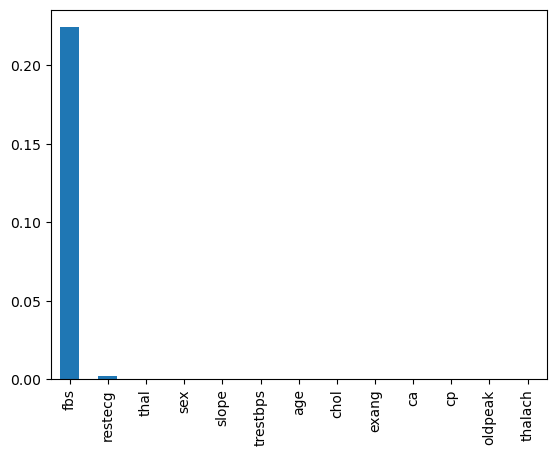

In [52]:
p_values.plot.bar()